# Unit 3 Lesson 5 Project 3

In [1]:
# NYPD Arrest Data for 2021

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #viz
import matplotlib.pyplot as plt #viz
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(r'C:\Users\chrsutton\NYPDArrestDataYTD.csv')

In [4]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [5]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
155502,222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,01/04/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)
155506,224056881,02/06/2021,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1451000,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031414,190787,40.690226,-73.829932,POINT (-73.82993153599993 40.69022556600004)


In [6]:
# Null value counts correspond to the column count inconsistencies

In [7]:
print(df.isnull().sum())

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         29
PD_DESC                      103
KY_CD                        103
OFNS_DESC                    103
LAW_CODE                       0
LAW_CAT_CD                  1393
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64


In [8]:
# Drop null values
df.dropna(inplace = True)

In [9]:
print(df.isnull().sum())

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64


In [10]:
# Looking for duplicate rows; there aren't any

In [11]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 19)


In [12]:
# Drop columns
df = df.drop(df.columns[[0, 2, 3, 4, 6, 9, 10, 14, 15, 16, 17,18]], axis=1)

In [13]:
# Rename 5 columns
df.rename(columns = {'ARREST_DATE': 'DATE','OFNS_DESC':'OFFENSE', 'LAW_CAT_CD':'LEVEL', 'ARREST_BORO':'BOROUGH','PERP_SEX':'GENDER',
                    'PERP_RACE': 'RACE'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154011 entries, 0 to 155506
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DATE       154011 non-null  object
 1   OFFENSE    154011 non-null  object
 2   LEVEL      154011 non-null  object
 3   BOROUGH    154011 non-null  object
 4   AGE_GROUP  154011 non-null  object
 5   GENDER     154011 non-null  object
 6   RACE       154011 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [15]:
df.describe()

,DATE,OFFENSE,LEVEL,BOROUGH,AGE_GROUP,GENDER,RACE
count,154011,154011,154011,154011,154011,154011,154011
unique,365,62,4,5,5,2,7
top,09/21/2021,ASSAULT 3 & RELATED OFFENSES,M,K,25-44,M,BLACK
freq,695,26855,82575,41312,87873,127564,76585


In [16]:
df.head()

,DATE,OFFENSE,LEVEL,BOROUGH,AGE_GROUP,GENDER,RACE
0,12/18/2021,RAPE,F,Q,18-24,M,BLACK
1,11/25/2021,ARSON,F,K,25-44,M,BLACK
2,10/14/2021,SEX CRIMES,F,K,25-44,M,WHITE
3,10/11/2021,ARSON,F,B,18-24,M,BLACK
5,09/27/2021,RAPE,F,K,25-44,M,BLACK


In [17]:
# Notes: change ARREST_DATE from string to date format

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154011 entries, 0 to 155506
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATE       154011 non-null  datetime64[ns]
 1   OFFENSE    154011 non-null  object        
 2   LEVEL      154011 non-null  object        
 3   BOROUGH    154011 non-null  object        
 4   AGE_GROUP  154011 non-null  object        
 5   GENDER     154011 non-null  object        
 6   RACE       154011 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.9+ MB


In [19]:
df['LEVEL'].unique()

array(['F', 'M', 'V', 'I'], dtype=object)

In [20]:
df['OFFENSE'].unique()

array(['RAPE', 'ARSON', 'SEX CRIMES', 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW',
       'PETIT LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'DANGEROUS DRUGS', 'NYS LAWS-UNCLASSIFIED FELONY', 'GRAND LARCENY',
       'OTHER OFFENSES RELATED TO THEF',
       'PROSTITUTION & RELATED OFFENSES',
       'OFFENSES AGAINST PUBLIC ADMINI', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'OTHER TRAFFIC INFRACTION',
       'FORGERY', 'INTOXICATED & IMPAIRED DRIVING',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'UNAUTHORIZED USE OF A VEHICLE',
       'BURGLARY', 'OFFENSES INVOLVING FRAUD', 'VEHICLE AND TRAFFIC LAWS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'THEFT OF SERVICES',
       'CRIMINAL TRESPASS', 'POSSESSION OF STOLEN PROPERTY',
       'OTHER STATE LAWS (NON PENAL LA', 'FRAUDULENT ACCOSTING',
       'OFFENSES AGAINST THE PERSON', 'FRAUDS', 'OTHER STATE LAWS',
       'THEFT-FRAUD', 'INTOXICATED/IMPAIRED DRIVING', 'GAMBLING'

In [21]:
df['BOROUGH'].unique()

array(['Q', 'K', 'B', 'M', 'S'], dtype=object)

In [22]:
df.groupby(['BOROUGH']).count()
# B = Bronx, S = Staten Island, K = Brooklyn, M = Manhattan, Q = Queens 

,DATE,OFFENSE,LEVEL,AGE_GROUP,GENDER,RACE
BOROUGH,,,,,,
B,33646,33646,33646,33646,33646,33646
K,41312,41312,41312,41312,41312,41312
M,39044,39044,39044,39044,39044,39044
Q,32814,32814,32814,32814,32814,32814
S,7195,7195,7195,7195,7195,7195


In [23]:
df.groupby(['LEVEL']).count()
# F = Felony, I = Traffic Infraction, M = Misdemeanor, V = Violation

,DATE,OFFENSE,BOROUGH,AGE_GROUP,GENDER,RACE
LEVEL,,,,,,
F,70821,70821,70821,70821,70821,70821
I,230,230,230,230,230,230
M,82575,82575,82575,82575,82575,82575
V,385,385,385,385,385,385


In [24]:
# Display arrests by month citywide; most took place in October, fewest number of arrests were in April

In [25]:
# I originally used a .count() delimiter below, but replaced it with .describe(). Output is sort of awkward-looking,
# but it reveals some interesting monthly data, particularly with regard to counts. It appears that 9/21 was the 
# busiest day of the year for arrests.

In [26]:
dfg = df.groupby(pd.Grouper(key='DATE',freq='1M')).describe()
dfg.index = dfg.index.strftime('%b')
dfg

DATE                                              OFFENSE         \
      count unique        top freq      first       last   count unique   
DATE                                                                      
Jan   13410     31 2021-01-06  626 2021-01-01 2021-01-31   13410     53   
Feb   11528     28 2021-02-04  611 2021-02-01 2021-02-28   11528     51   
Mar   13840     31 2021-03-10  618 2021-03-01 2021-03-31   13840     54   
Apr   10296     30 2021-04-07  534 2021-04-01 2021-04-30   10296     53   
May   11701     31 2021-05-19  555 2021-05-01 2021-05-31   11701     52   
Jun   12721     30 2021-06-10  611 2021-06-01 2021-06-30   12721     54   
Jul   13454     31 2021-07-14  632 2021-07-01 2021-07-31   13454     55   
Aug   13599     31 2021-08-19  611 2021-08-01 2021-08-31   13599     55   
Sep   13609     30 2021-09-21  695 2021-09-01 2021-09-30   13609     57   
Oct   14341     31 2021-10-13  674 2021-10-01 2021-10-31   14341     54   
Nov   12965     30 2021-11-17  642 2021-11-01 2021-11-30   12965     54   
Dec   12547     31 2021-12-01  594 2021-12-01 2021-12-31   12547     54   

                                          ... GENDER                     RACE  \
                               top  freq  ...    top   freq first last  count   
DATE                                      ...                                   
Jan   ASSAULT 3 & RELATED OFFENSES  2077  ...      M  11263   NaN  NaN  13410   
Feb   ASSAULT 3 & RELATED OFFENSES  1900  ...      M   9681   NaN  NaN  11528   
Mar   ASSAULT 3 & RELATED OFFENSES  2326  ...      M  11542   NaN  NaN  13840   
Apr   ASSAULT 3 & RELATED OFFENSES  1981  ...      M   8459   NaN  NaN  10296   
May   ASSAULT 3 & RELATED OFFENSES  2170  ...      M   9507   NaN  NaN  11701   
Jun   ASSAULT 3 & RELATED OFFENSES  2203  ...      M  10600   NaN  NaN  12721   
Jul   ASSAULT 3 & RELATED OFFENSES  2451  ...      M  11107   NaN  NaN  13454   
Aug   ASSAULT 3 & RELATED OFFENSES  2422  ...      M  11383   NaN  NaN  13599   
Sep   ASSAULT 3 & RELATED OFFENSES  2407  ...      M  11282   NaN  NaN  13609   
Oct   ASSAULT 3 & RELATED OFFENSES  2510  ...      M  11794   NaN  NaN  14341   
Nov   ASSAULT 3 & RELATED OFFENSES  2289  ...      M  10683   NaN  NaN  12965   
Dec   ASSAULT 3 & RELATED OFFENSES  2119  ...      M  10263   NaN  NaN  12547   

                                     
     unique    top  freq first last  
DATE                                 
Jan       7  BLACK  6873   NaN  NaN  
Feb       7  BLACK  5663   NaN  NaN  
Mar       7  BLACK  6980   NaN  NaN  
Apr       7  BLACK  4861   NaN  NaN  
May       7  BLACK  5904   NaN  NaN  
Jun       7  BLACK  6298   NaN  NaN  
Jul       7  BLACK  6729   NaN  NaN  
Aug       7  BLACK  6672   NaN  NaN  
Sep       7  BLACK  6615   NaN  NaN  
Oct       7  BLACK  7253   NaN  NaN  
Nov       7  BLACK  6463   NaN  NaN  
Dec       7  BLACK  6274   NaN  NaN  

[12 rows x 42 columns]

In [27]:
df['BOROUGH'].value_counts()

K    41312
M    39044
B    33646
Q    32814
S     7195
Name: BOROUGH, dtype: int64

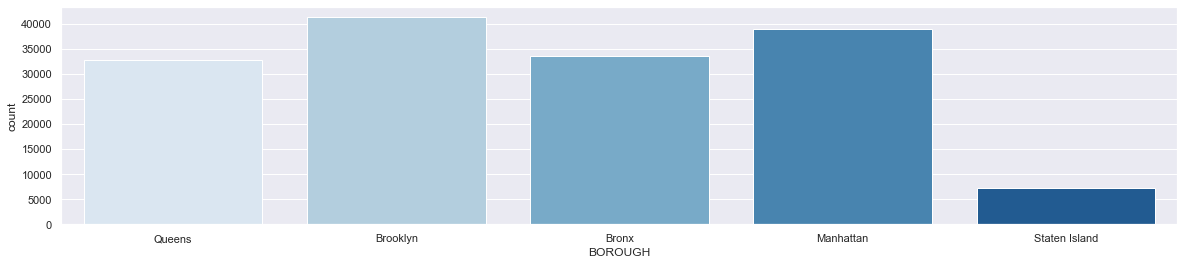

In [28]:
plt.figure(figsize=(20,4))
sns.countplot(x='BOROUGH', data=df,palette='Blues')
positions = (0,1,2,3,4)
labels = ('Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island')
plt.xticks(positions, labels)
plt.show()

In [29]:
df['AGE_GROUP'].value_counts()

25-44    87873
45-64    30329
18-24    28741
<18       4799
65+       2269
Name: AGE_GROUP, dtype: int64

In [30]:
df['GENDER'].value_counts()

M    127564
F     26447
Name: GENDER, dtype: int64

In [31]:
df['RACE'].value_counts()

BLACK                             76585
WHITE HISPANIC                    37665
WHITE                             16918
BLACK HISPANIC                    13345
ASIAN / PACIFIC ISLANDER           8480
UNKNOWN                             576
AMERICAN INDIAN/ALASKAN NATIVE      442
Name: RACE, dtype: int64

In [32]:
# I analyzed arrests in Brooklyn, noting that most arrests took place there.
# Largest number of individuals arrested were between 25 and 44, Black, and Male
# Categories with the highest number of arrests in that age group were Misdemeanors (11828), followed by Felonies (11502)
# Examining Felonies, most arrests were for Felony Assault
# Examining Misdemeanors, most arrests were for Assault 3 and Related Offenses


In [33]:
dfB = df[df['BOROUGH']== 'K']

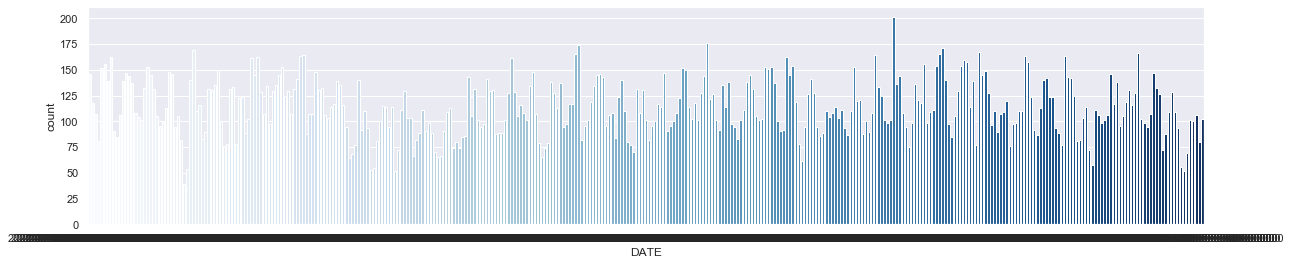

In [34]:
plt.figure(figsize=(20,4))
sns.countplot(x='DATE', data=dfB,palette='Blues')

In [35]:
dfB['AGE_GROUP'].value_counts()

25-44    23508
18-24     8092
45-64     7653
<18       1466
65+        593
Name: AGE_GROUP, dtype: int64

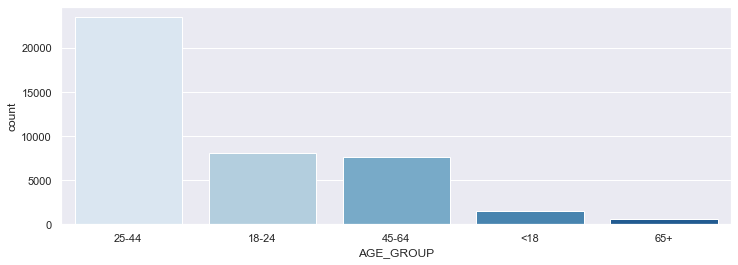

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='AGE_GROUP', data=dfB,palette='Blues')

In [37]:
dfB['RACE'].value_counts()

BLACK                             24490
WHITE HISPANIC                     7565
WHITE                              5211
BLACK HISPANIC                     1964
ASIAN / PACIFIC ISLANDER           1843
UNKNOWN                             126
AMERICAN INDIAN/ALASKAN NATIVE      113
Name: RACE, dtype: int64

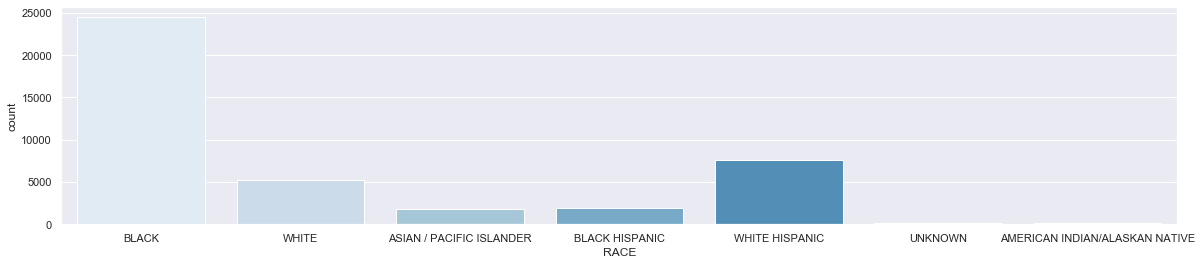

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(x='RACE', data=dfB,palette='Blues')

In [39]:
dfB['GENDER'].value_counts()

M    34437
F     6875
Name: GENDER, dtype: int64

In [40]:
dfA = dfB[dfB['AGE_GROUP']== '25-44']

In [41]:
dfA['LEVEL'].value_counts()

M    11828
F    11502
V      152
I       26
Name: LEVEL, dtype: int64

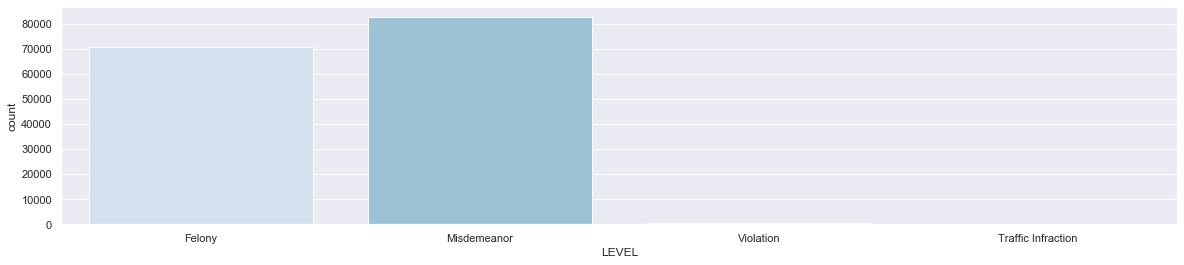

In [42]:
plt.figure(figsize=(20,4))
sns.countplot(x='LEVEL', data=df,palette='Blues')
positions = (0,1,2,3)
labels = ('Felony', 'Misdemeanor', 'Violation', 'Traffic Infraction')
plt.xticks(positions, labels)
plt.show()

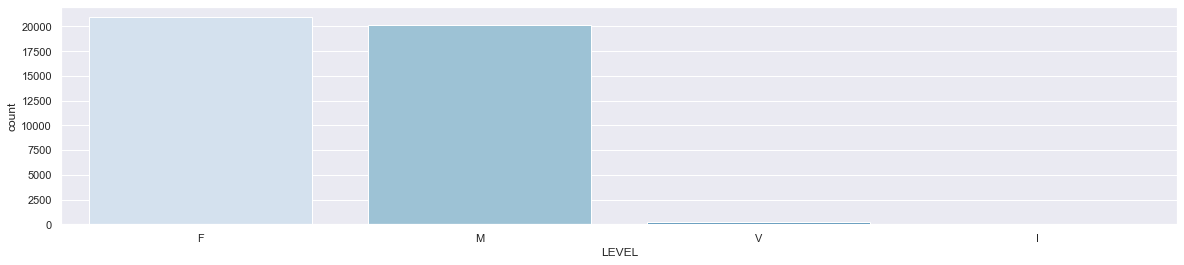

In [43]:
plt.figure(figsize=(20,4))
sns.countplot(x='LEVEL', data=dfB,palette='Blues')

In [44]:
# Felonies

In [45]:
dfL1 = dfA[dfA['LEVEL']== 'F']

In [46]:
dfL1['OFFENSE'].value_counts()

FELONY ASSAULT                     2667
MISCELLANEOUS PENAL LAW            2131
ROBBERY                            1025
DANGEROUS WEAPONS                   985
CRIMINAL MISCHIEF & RELATED OF      801
DANGEROUS DRUGS                     775
BURGLARY                            755
GRAND LARCENY                       693
FORGERY                             646
MURDER & NON-NEGL. MANSLAUGHTE      193
GRAND LARCENY OF MOTOR VEHICLE      165
POSSESSION OF STOLEN PROPERTY       135
NYS LAWS-UNCLASSIFIED FELONY        124
INTOXICATED/IMPAIRED DRIVING        103
SEX CRIMES                           95
RAPE                                 84
VEHICLE AND TRAFFIC LAWS             28
ARSON                                21
THEFT-FRAUD                          20
KIDNAPPING & RELATED OFFENSES        15
GAMBLING                             10
INTOXICATED & IMPAIRED DRIVING       10
CHILD ABANDONMENT/NON SUPPORT         9
OTHER STATE LAWS (NON PENAL LA        8
KIDNAPPING                            2


In [47]:
# Misdemeanors

In [48]:
dfL2 = dfA[dfA['LEVEL']== 'M']

In [49]:
dfL2['OFFENSE'].value_counts()

ASSAULT 3 & RELATED OFFENSES            3910
PETIT LARCENY                           1691
VEHICLE AND TRAFFIC LAWS                 825
CRIMINAL MISCHIEF & RELATED OF           753
OFFENSES INVOLVING FRAUD                 652
OFF. AGNST PUB ORD SENSBLTY &            632
DANGEROUS DRUGS                          571
SEX CRIMES                               433
OFFENSES AGAINST PUBLIC ADMINI           408
INTOXICATED & IMPAIRED DRIVING           394
OTHER OFFENSES RELATED TO THEF           332
OTHER TRAFFIC INFRACTION                 298
DANGEROUS WEAPONS                        188
CRIMINAL TRESPASS                        180
POSSESSION OF STOLEN PROPERTY            103
OFFENSES AGAINST THE PERSON               90
ALCOHOLIC BEVERAGE CONTROL LAW            80
UNAUTHORIZED USE OF A VEHICLE             69
BURGLAR'S TOOLS                           51
GAMBLING                                  47
FRAUDS                                    37
PROSTITUTION & RELATED OFFENSES           25
OTHER STAT

In [50]:
dfO1 = dfL1[dfL1['OFFENSE']== 'FELONY ASSAULT']

In [51]:
dfO1['RACE'].value_counts()

BLACK                             1740
WHITE HISPANIC                     430
WHITE                              257
BLACK HISPANIC                     123
ASIAN / PACIFIC ISLANDER           102
AMERICAN INDIAN/ALASKAN NATIVE       8
UNKNOWN                              7
Name: RACE, dtype: int64

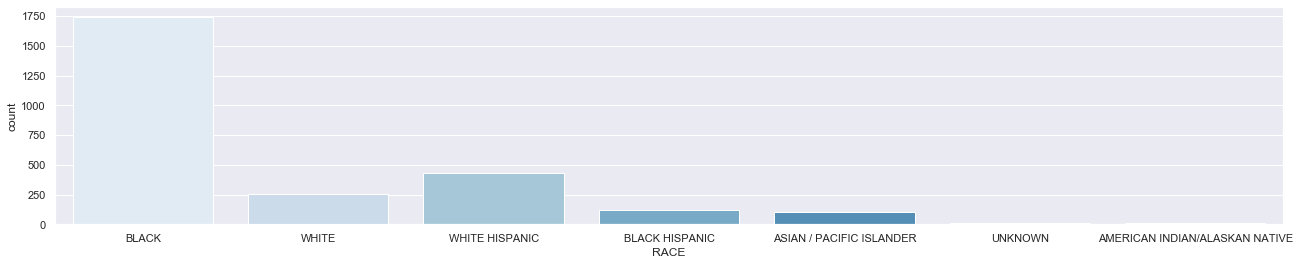

In [52]:
plt.figure(figsize=(22,4))
sns.countplot(x='RACE', data=dfO1,palette='Blues')

In [53]:
dfO1['GENDER'].value_counts()

M    1961
F     706
Name: GENDER, dtype: int64